### <b> Apple Classifier </b> 

This notebook is a Deep Learning project  to train and deploy an image classifier using FastAI's API.

In [1]:
from fastbook import *
from fastai.vision.widgets import *

##### 1. Gathering Data from the web

In [2]:
apple_types = ['red', 'green', 'logo']
path = Path('apple')

In [ ]:
# Search for and download images
for a in apple_types:
    dest = (path/a)
    results = search_images_ddg(f'{a} apple images')
    for i in range(len(results)):
        try:
            download_url(results[i], dest / f'{i}.jpg')
        except Exception as e:
            print(f"Error downloading {results[i]}: {e}")

In [4]:
#Check download images to designated path
images = get_image_files(path)
images

(#580) [Path('apple/green/0.jpg'),Path('apple/green/1.jpg'),Path('apple/green/10.jpg'),Path('apple/green/100.jpg'),Path('apple/green/101.jpg'),Path('apple/green/102.jpg'),Path('apple/green/103.jpg'),Path('apple/green/104.jpg'),Path('apple/green/105.jpg'),Path('apple/green/106.jpg')...]

In [8]:
# Check for corrupt images
failed = verify_images(images)
failed

(#25) [Path('apple/green/108.jpg'),Path('apple/green/117.jpg'),Path('apple/green/133.jpg'),Path('apple/green/174.jpg'),Path('apple/green/197.jpg'),Path('apple/green/199.jpg'),Path('apple/green/38.jpg'),Path('apple/green/51.jpg'),Path('apple/logo/104.jpg'),Path('apple/logo/11.jpg')...]

In [9]:
#Remove corrupt images from directory
failed.map(Path.unlink)

(#25) [None,None,None,None,None,None,None,None,None,None...]

##### 2. Data Loaders

A DataLoader object allows you to store data and <b> split it into training and validation sets </b>.
<p> In this case, I'll use the <b> data block API </b> that is extremely flexible and customizable. </p>

In [10]:
apples = DataBlock(
    blocks=(ImageBlock,CategoryBlock), #defines the Independente and Dependent variables
    get_items=get_image_files, # asserts the types of data that will be used and fetches a list of all images it from a designated file path
    splitter=RandomSplitter(valid_pct=0.2, seed=42), #splits the dataset randomly into training (0.8) and validation (0.2)
    get_y=parent_label, #gets the labels from the name of the parent directory of the images
    item_tfms=Resize(128) #adjusts the images to a size of 128x128
)

In [11]:
#Create the DataLoader based on the previously defined DataBlock and path
dls = apples.dataloaders(path)

c:\Users\Rodrigo\anaconda3\envs\torchEnv\Lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


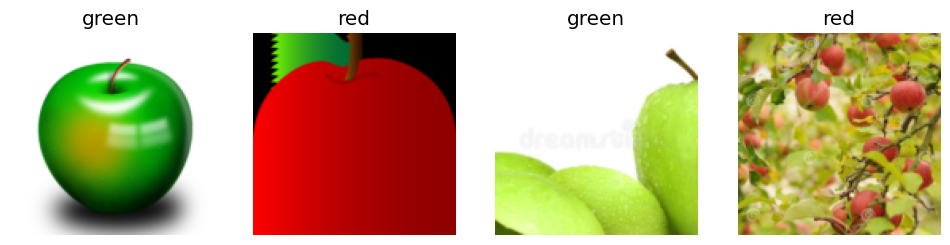

In [12]:
#Check a few items from the validation set
dls.valid.show_batch(max_n=4, nrows=1)

To prevent images from losing details when being resized to 128x128, we can alternatively <b> pad </b> the images or <b> squish/stretch</b> them.
<p> </p> In order to do so we can change the type of item transformation that is applied to the DataBlock:

c:\Users\Rodrigo\anaconda3\envs\torchEnv\Lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


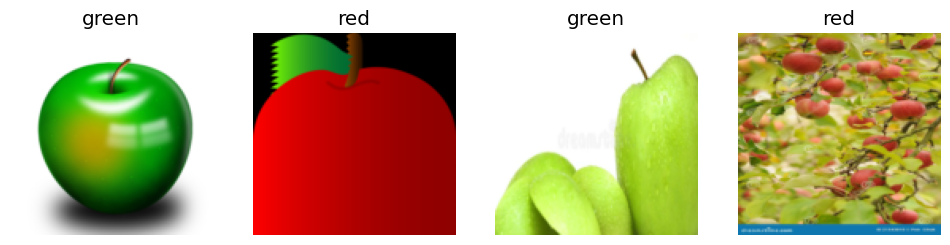

In [13]:
# Squishing transformation
apples = apples.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = apples.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

c:\Users\Rodrigo\anaconda3\envs\torchEnv\Lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


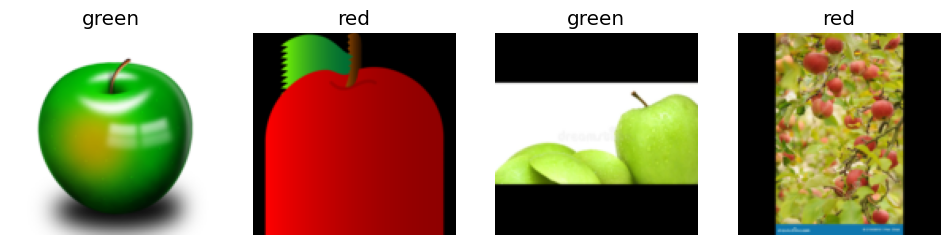

In [14]:
# Padding transformation
apples = apples.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = apples.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)